<a href="https://colab.research.google.com/github/louispranata/UTS_ML2019_12741423/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2: Practical Machine Learning Project

#Introduction

This report will be addressing a real-world problem and tries to solve it by producing analysis of its data and building data models. Based on the data, they will be tested accordingly and be compared with each other to provide concrete evidences of the solutions to the problems. For this report, it will be created by the cloud computing environment of Google Colab and using by the Python programming language.

The dataset that will be used to solve the problem is the train.csv which contains over 40000 international football results from the year 1872 to now. Each rows contain some corresponding attributes such as date, the teams, score line, tournament and venue. This file will be used as the input  of the data which is used to help to solve the problem.  

Columns | Definitions  
---|---
Age | Age in years
Sex| 1= Male, 0= Female
cp|chest pain type. Value 0: asymptomatic, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: typical angina
trestbps|resting blood pressure (in mm Hg on admission to the hospital)
chol|serum cholestoral in mg/dl
fbs|(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg|resting electrocardiographic results. Value 0: showing probable or definite left ventricular hypertrophy by 
|Estes' criteria, Value 1: normal, Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
thalach|maximum heart rate achieved
exang|exercise induced angina (1 = yes; 0 = no)
oldpeak|ST depression induced by exercise relative to rest
slope|the slope of the peak exercise ST segment. 0: downsloping; 1: flat; 2: upsloping
ca|number of major vessels (0-3) colored by flourosopy
thal|3 = normal; 6 = fixed defect; 7 = reversable defect
target|0 = disease, 1 = no disease

# 1. Visualization & Pre-Processing

##Importing Libraries

In [0]:
import numpy as np 
import pandas as pd
import xarray as xr  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats

##Load the Data

In [0]:
train = pd.read_csv('heart.csv')
test = pd.read_csv('hearttest.csv')


##Data Exploration

In [5]:
train.head()
train.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [0]:
len(train)

303

In [0]:
train['cp'].unique()

array([3, 2, 1, 0])

In [0]:
train['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [0]:
england_data = train.loc[train['target'] == 1]
england_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
print ("The train data has a size of {}" .format(train.shape))
print ("The test data has a size of {}" .format(test.shape))

The train data has a size of (303, 14)
The test data has a size of (303, 13)


##Data Processing

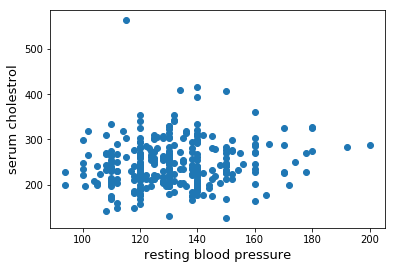

In [0]:
fig, ax = plt.subplots()
ax.scatter(x = train['trestbps'], y = train['chol'])
plt.xlabel('resting blood pressure', fontsize=13)
plt.ylabel('serum cholestrol', fontsize=13)
plt.show()

In [0]:
train = train.drop(train[(train['trestbps']>160) 
                         & 
                         (train['chol']<380)].index)

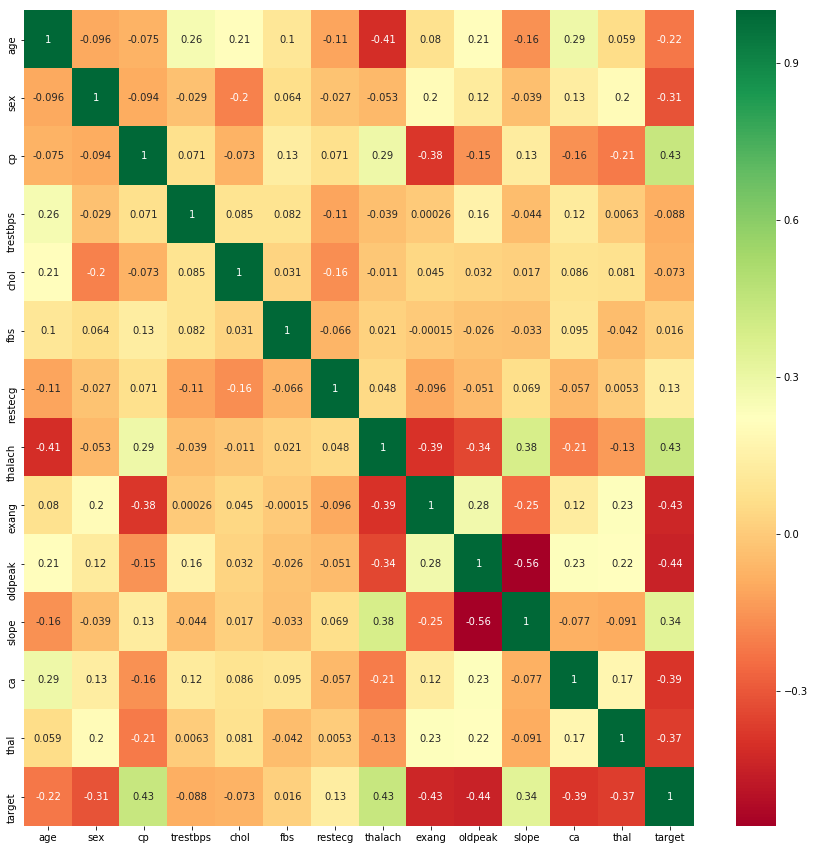

In [0]:
corrmat = train.corr()
top_corr_var = corrmat.index[abs(corrmat["chol"])>0]
plt.figure(figsize=(15,15))
ax = sns.heatmap(train[top_corr_var].corr(), 
                annot=True,cmap="RdYlGn")

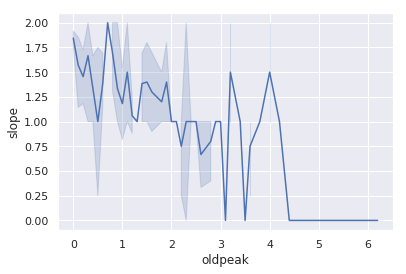

In [0]:
sns.lineplot(train.oldpeak,train.slope)

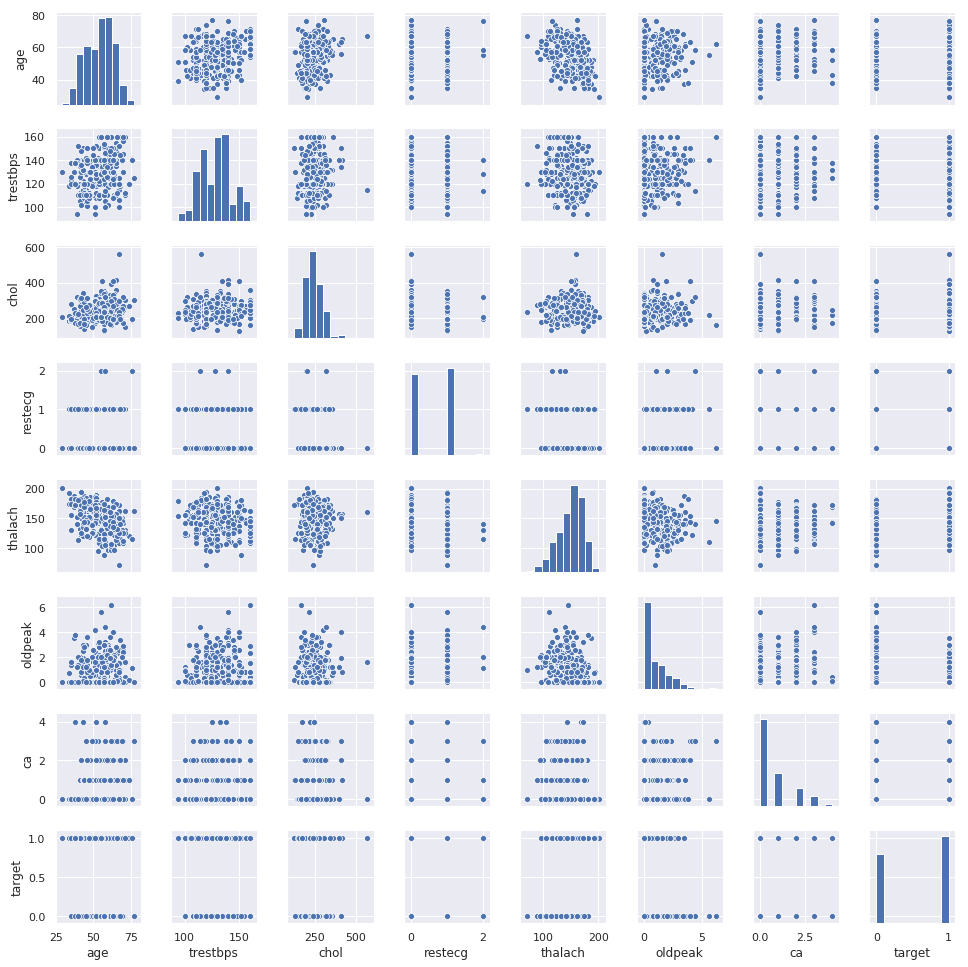

In [0]:
sns.set()
cols = ['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'ca','target']
sns.pairplot(train[cols], height = 1.7)
plt.show();

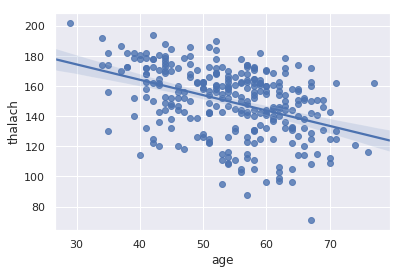

In [0]:
sns.regplot(train.age,train.thalach)


 mu = 1.01 and sigma = 1.13



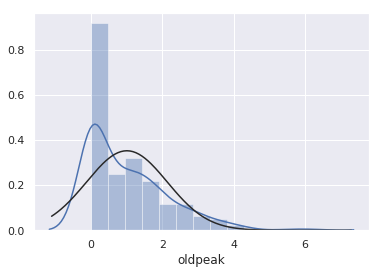

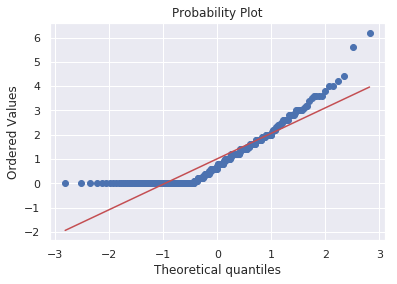

In [0]:
def check_skewness(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Check the skewness of target variable
check_skewness('oldpeak')


 mu = 0.56 and sigma = 0.52



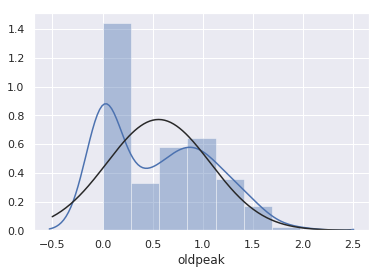

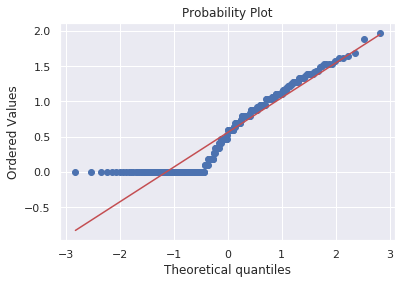

In [0]:
train["oldpeak"] = np.log1p(train["oldpeak"])

check_skewness('oldpeak')